<a href="https://colab.research.google.com/github/NelsonSSoares/Ciencia-de-Dadosu9/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

**Objetivo**: Aprender o que é Regressão Linear e introduzir intuições sobre o Método do Gradiente e o Método do Gradiente Estocástico assim como os problemas de regressão de aprendizagem de máquina. 

<img src="https://www.edsonmelo.com.br/dados_csv/images/reg-linear1.png" alt="reg-linear" style="width: 400px;"/>

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots \theta_n x_n$$

$\hat{y}$ - valor previsto

$\theta$ - parâmetro do modelo

$n$ - número de atributos (*features*)

$x_i$ - o valor do *inésimo* atributo (*feature*)

### Exemplo

$\mathrm{preço~de~residência} = 4500 + 1000\times \mathrm{quartos} + 120 \times \mathrm{m}^2 + 3000 \times \mathrm{banheiros}$

### *Mean Squared Error* (MSE) - Erro Quadrático Médio

$$MSE = \frac{1}{m}\Sigma_{i=1}^{m}{(\hat{y}_i - y_i)^2}$$

### *Mean Absolute Error* (MAE) - Erro Absoluto Médio
$$MAE = \frac{1}{m}\Sigma_{i=1}^{m}{|\hat{y}_i - y_i|}$$

<img src="https://www.edsonmelo.com.br/dados_csv/images/gradient-descent.gif" alt="gradient-descent-animation" style="width: 500px;"/>

# Aplicando Códigos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Criação do DataFrame
dataframe = pd.DataFrame()

# horas de estudo
dataframe['x'] = [5.1, 5.5, 5.9, 6.5, 6.8, 7.6, 8.3, 8.5, 9.1, 9.5]

# pontuaçao alcançada
dataframe['y'] = [2.0, 2.9, 4.0, 5.9, 6.0, 6.9, 8.0, 9.0, 9.9, 10.0]

x_values = dataframe[['x']]
y_values = dataframe[['y']]

In [ ]:
dataframe.describe()

,x,y
count,10.000000,10.000000
mean,7.280000,6.460000
std,1.546897,2.838701
min,5.100000,2.000000
25%,6.050000,4.475000
50%,7.200000,6.450000
75%,8.450000,8.750000
max,9.500000,10.000000


In [ ]:
# treinamento do modelo de Regressão Linear Simples
model = linear_model.LinearRegression()
model.fit(x_values, y_values)

LinearRegression()

In [ ]:
# mostrando os valores obtidos
print('Utilizando biblioteca Scikit-Learn')
print('y = ax + b')
print('a = %.2f => a inclinação da linha de tendência.' % model.coef_[0][0])
print('b = %.2f => o ponto onde a linha de tendência atinge o eixo y.' % model.intercept_[0])

Utilizando biblioteca Scikit-Learn
y = ax + b
a = 1.81 => a inclinação da linha de tendência.
b = -6.74 => o ponto onde a linha de tendência atinge o eixo y.


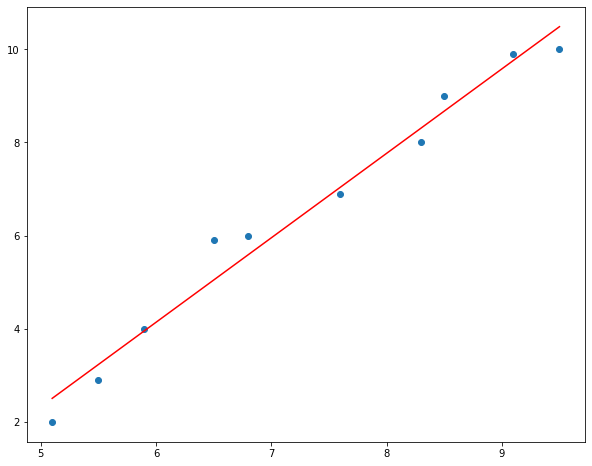

In [ ]:
# plotando o gráfico da regressão
plt.figure(1, figsize=(10, 8))
plt.scatter(dataframe['x'].values, dataframe['y'].values)
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
fit_fn = np.poly1d(fit) 
plt.plot(dataframe['x'].values, fit_fn(dataframe['x'].values), 'r')
plt.show()

In [ ]:
# informando um valor que não está originalmente na lista de valores
entrada = 6.2 # horas de estudo
predicao = model.predict(np.array([[entrada]]))
print('Predição:', predicao)

Predição: [[4.50209881]]


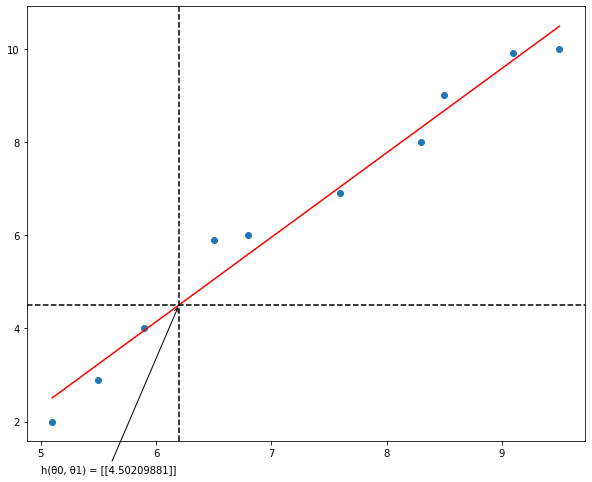

In [ ]:
# traçando linhas das coordenadas para mostrar a inferência
plt.figure(1, figsize=(10, 8))
plt.scatter(dataframe['x'].values, dataframe['y'].values)
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
fit_fn = np.poly1d(fit)

txt ='h(θ0, θ1) = ' + str(predicao)
plt.annotate(txt, xy=(entrada, predicao), xytext=(5, 0.9), arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

plt.plot(dataframe['x'].values, fit_fn(dataframe['x'].values), 'r')
plt.axvline(x=entrada, ymin=0, ymax=predicao, ls='--',c='black')
plt.axhline(y=predicao, ls='--',c='black')

In [ ]:
# realizando regressão linear via carregamento de um arquivo
dados = pd.read_csv("https://www.edsonmelo.com.br/dados_csv/dados_regressao.csv", sep=',', header=None)
dados.shape

(50, 2)

In [ ]:
dataframe = pd.DataFrame()
# coletando os dados da coluna (0)->x
dataframe['x'] = dados.values[:, 0]
dataframe['y'] = dados.values[:, -1]
x_values = dataframe[['x']]
y_values = dataframe[['y']]

y = ax + b
a = 0.06 => a inclinação da linha de tendência
b = 0.75 => o ponto onde a linha de tendência atinge o eixo y


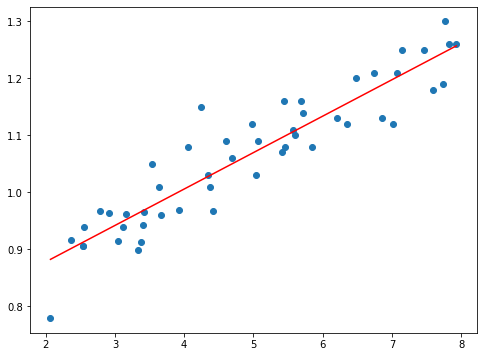

In [ ]:
# treinar o modelo
modelo = linear_model.LinearRegression(normalize=True)
modelo.fit(x_values, y_values)
print('y = ax + b')
print('a = %.2f => a inclinação da linha de tendência' % modelo.coef_[0][0])
print('b = %.2f => o ponto onde a linha de tendência atinge o eixo y' % modelo.intercept_[0])

plt.figure(1, figsize=(8, 6))
plt.scatter(dataframe['x'].values, dataframe['y'].values)
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
fit_fn = np.poly1d(fit)
plt.plot(dataframe['x'].values, fit_fn(dataframe['x'].values), 'r')
plt.show()

In [ ]:
entrada = 6.5
predicao = modelo.predict(np.array([[entrada]]))
print('Predição: ', predicao)

Predição:  [[1.16557617]]


In [ ]:
# outra predição
horas_estudo = np.array([1,5,7,8,10,11,14,15,15,19]).reshape((-1, 1))
print(horas_estudo)

[[ 1]
 [ 5]
 [ 7]
 [ 8]
 [10]
 [11]
 [14]
 [15]
 [15]
 [19]]


# Statsmodel
## Regressão Linear Simples

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [ ]:
df = pd.read_csv('https://www.edsonmelo.com.br/dados_csv/dados_midias.csv')
print('Total de registros:', df.shape[0])
print('Total de colunas..:', df.shape[1])

Total de registros: 200
Total de colunas..: 5


In [ ]:
df.head()

,seq,tv,radio,jornal,vendas
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# apagando colunas desnecessárias
df.drop(['seq'], axis=1)

,tv,radio,jornal,vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


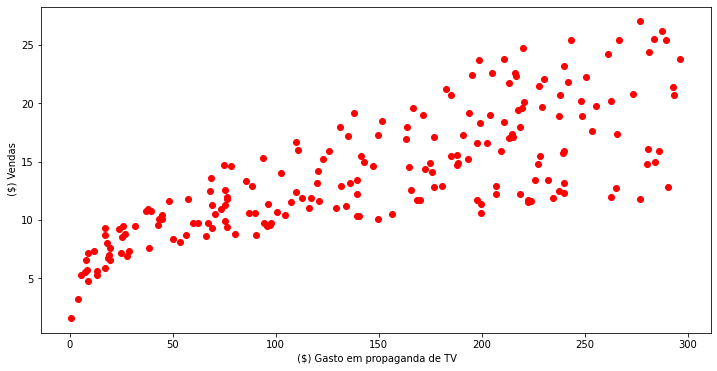

In [ ]:
# plotando os dados brutos
plt.figure(figsize = (12,6))
plt.scatter(
    df['tv'], 
    df['vendas'], 
    c='red')
plt.xlabel(" ($) Gasto em propaganda de TV")
plt.ylabel(" ($) Vendas")
plt.show()

In [ ]:
# Prevendo o retorno do investimento (RoI)
X = df['tv'].values.reshape(-1,1)
y = df['vendas'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("Vendas = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

# Aqui temos o nosso modelo, onde os dois primeiros valores são as constantes 
# geradas pelo modelo, e o "X" representa o valor investido em propaganda de TV, 
# ou seja, essa é a conta matemática que nos ajuda a prever o retorno de um 
# investimento!

Vendas = 7.0326 + 0.047537X


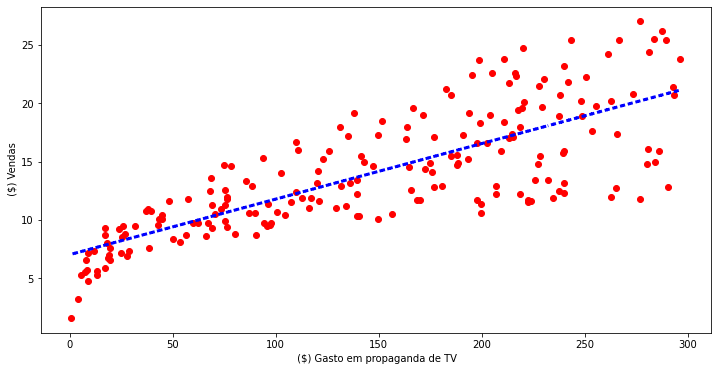

In [ ]:
# plotando a regressão sobre os dados brutos
previsoes = reg.predict(X)

plt.figure(figsize = (12,6))
plt.scatter(
    df['tv'], 
    df['vendas'], 
    c='red')

plt.plot(
    df['tv'],
    previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" ($) Gasto em propaganda de TV")
plt.ylabel(" ($) Vendas")
plt.show()

In [ ]:
# Fazendo a predição de um valor específico para uma televisão
reg.predict(np.array([[120]]).reshape(-1,1))

array([[12.7369904]])

In [ ]:
# Avaliando o modelo
X = df['tv']
y = df['vendas']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        14:06:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [ ]:
# Observe que o R² está em 0.612, isso quer dizer que aproximadamente 60% do 
# comportamento da variável "Vendas" é explicado pela variável "TV".

# Quando analisamos o "p-valor" observamos que ele está bem baixo, 
# algo bem próximo à zero foi encoberto pelo arredondamento, 
# isso nos faz rejeitar a hipótese nula.

# Regressão Linear Múltipla

In [ ]:
# Prevendo o valor de vendas
Xs = df.drop(['seq', 'vendas'], axis=1)
y = df['vendas'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

print("Vendas = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*jornal".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

Vendas = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*jornal


In [ ]:
# Fazendo a predição de um valor específico para uma televisão
reg.predict(np.array([[230.1, 40, 78]]))

array([[20.92961051]])

In [ ]:
# Verificando a precisão do modelo
X = np.column_stack((df['tv'], df['radio'], df['jornal']))
y = df['vendas']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        14:09:38   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [ ]:
# Observe que agora temos um modelo muito melhor, onde quase 90% dos 
# resultados em vendas são explicados pelas variáveis que temos. 

# Além disso, é importante observar a informação dada pela "Estatística-F", 
# esse número mostra que temos uma variância muito alta em nosso 
# conjunto de dados, provavelmente explicada pelo tamanho muito pequeno de apenas
# 200 observações no dataset.